In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# 윈도우인 경우
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False

sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
pothole_df = pd.read_csv('data/인천포트홀_0704.csv')

# hum_df = pd.read_csv('데이터원소화/전체날씨데이터/일일_습도_평균_최대_최소_표준.csv')
# _hum_df = pd.read_csv('데이터원소화/전체날씨데이터/어제_습도_평균_최대_최소_표준.csv')

temp_df = pd.read_csv('data/데이터원소화/전체날씨데이터/일일_기온_평균_최대_최소_표준.csv')
_temp_df = pd.read_csv('data/데이터원소화/전체날씨데이터/어제_기온_평균_최대_최소_표준.csv')

# wind_df = pd.read_csv('데이터원소화/전체날씨데이터/일일_풍속_평균_최대_최소_표준.csv')
# _wind_df = pd.read_csv('데이터원소화/전체날씨데이터/어제_풍속_평균_최대_최소_표준.csv')

# aqua_df = pd.read_csv('데이터원소화/전체날씨데이터/일일_강수량_평균_최대_최소_표준.csv')
# _aqua_df = pd.read_csv('데이터원소화/전체날씨데이터/어제_강수량_평균_최대_최소_표준.csv')

pothole_df['count']=1
pothole_df = pothole_df.groupby(['date','region_id'])[['count']].count()
pothole_df

count
date       region_id       
2021-08-11 2301058        1
           2304054        1
           2304055        1
           2304057        1
           2304058        3
...                     ...
2021-10-26 2305067        2
           2305072        1
           2305074        1
           2308051        1
           2308078        1

[622 rows x 1 columns]

In [3]:
temp_days_df = pd.read_csv('data/데이터원소화/전체날씨데이터/7_14_30일간_기온_평균최대_평균최소_최대일교차_최대기온_최소기온.csv')

temp_days_df = temp_days_df.set_index(['date','region_id'])

merge_td = pd.merge(pothole_df, temp_days_df, how='inner', left_index=True, right_index=True)

merge_td = merge_td.reset_index()

merge_td

,date,region_id,count,temp_avg,temp_max,temp_min,temp_std,temp_max_std,temp_min_std,temp_avg_idx,...,temp_avg_max_30d,temp_avg_min_30d,temp_chg_max_30d,temp_max_30d,temp_min_30d,temp_avg_max_30d_idx,temp_avg_min_30d_idx,temp_chg_max_30d_idx,temp_max_30d_idx,temp_min_30d_idx
0,2021-08-11,2301058,1,26.60,30.0,24.4,1.29,1.29,1.33,5,...,30.48,25.97,12.0,34.5,23.0,15,12,6,17,11
1,2021-08-11,2304054,1,27.40,31.6,23.6,1.36,1.35,1.31,5,...,30.51,25.84,12.0,36.8,22.5,15,12,6,18,11
2,2021-08-11,2304055,1,27.40,31.6,23.6,1.36,1.35,1.31,5,...,30.51,25.84,12.0,36.8,22.5,15,12,6,18,11
3,2021-08-11,2304057,1,27.40,31.6,23.6,1.36,1.35,1.31,5,...,30.51,25.84,12.0,36.8,22.5,15,12,6,18,11
4,2021-08-11,2304058,3,27.40,31.6,23.6,1.36,1.35,1.31,5,...,30.51,25.84,12.0,36.8,22.5,15,12,6,18,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,2021-10-26,2305067,2,13.02,18.0,10.0,0.01,-0.00,0.13,2,...,24.01,5.27,7.0,28.6,1.1,12,2,3,14,0
618,2021-10-26,2305072,1,12.08,18.0,8.2,-0.06,-0.00,0.02,2,...,24.37,4.91,6.0,28.9,0.2,12,2,3,14,0
619,2021-10-26,2305074,1,14.72,18.3,12.1,0.12,0.06,0.22,2,...,24.56,6.93,8.0,27.6,2.1,12,3,4,13,1
620,2021-10-26,2308051,1,13.70,17.8,10.7,0.07,0.00,0.16,2,...,24.01,5.95,7.0,28.2,0.8,12,2,3,14,0


### 7일간 기온 평균/최대/최소/일교차

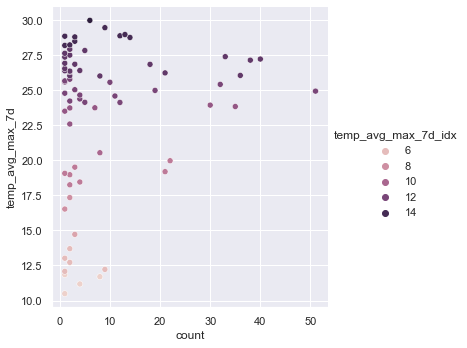

In [4]:
merge_td_tavg_max = merge_td.groupby('temp_avg_max_7d',as_index=False).agg({'count':'count', 'temp_avg_max_7d_idx':'mean'})
sns.relplot(x='count', y='temp_avg_max_7d',hue='temp_avg_max_7d_idx',data=merge_td_tavg_max)

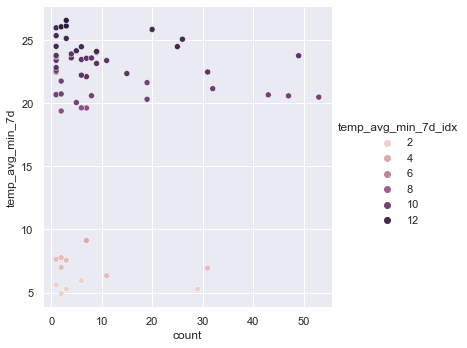

In [5]:
merge_td_tavg_min = merge_td.groupby('temp_avg_min_7d',as_index=False).agg({'count':'count', 'temp_avg_min_7d_idx':'mean'})
sns.relplot(x='count', y='temp_avg_min_7d',hue='temp_avg_min_7d_idx',data=merge_td_tavg_min)

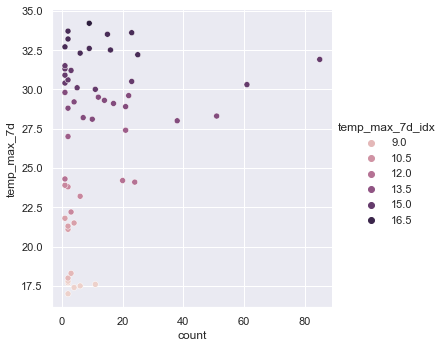

In [6]:
merge_td_tmax = merge_td.groupby('temp_max_7d',as_index=False).agg({'count':'count', 'temp_max_7d_idx':'mean'})
sns.relplot(x='count', y='temp_max_7d',hue='temp_max_7d_idx',data=merge_td_tmax)

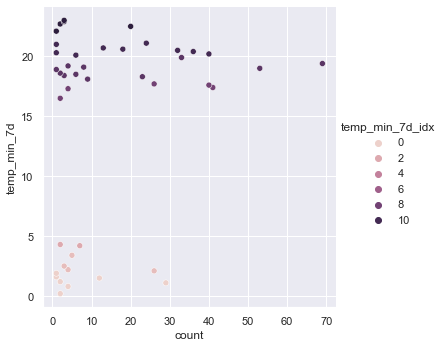

In [7]:
merge_td_tmin = merge_td.groupby('temp_min_7d',as_index=False).agg({'count':'count', 'temp_min_7d_idx':'mean'})
sns.relplot(x='count', y='temp_min_7d',hue='temp_min_7d_idx',data=merge_td_tmin)

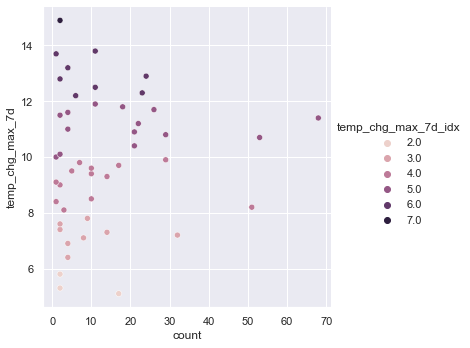

In [37]:
merge_td_chg_7d = merge_td.groupby('temp_chg_max_7d',as_index=False).agg({'count':'count', 'temp_chg_max_7d_idx':'mean'})
sns.relplot(x='count', y='temp_chg_max_7d',hue='temp_chg_max_7d_idx',data=merge_td_chg_7d)
# sns.heatmap(merge_td_chg_7d.corr(), annot=True)

### 14일간 기온 평균/최대/최소/일교차

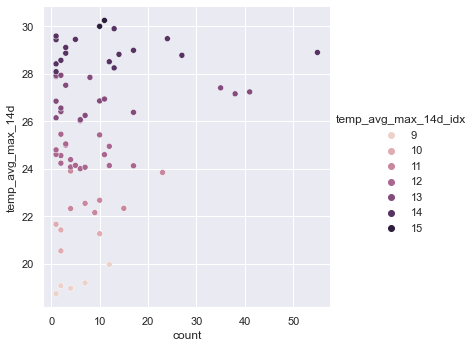

In [9]:
merge_td_tavg_max = merge_td.groupby('temp_avg_max_14d',as_index=False).agg({'count':'count', 'temp_avg_max_14d_idx':'mean'})
sns.relplot(x='count', y='temp_avg_max_14d',hue='temp_avg_max_14d_idx',data=merge_td_tavg_max)

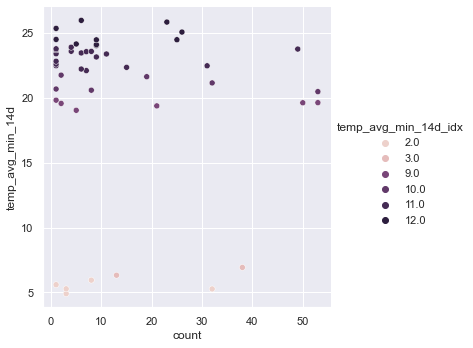

In [10]:
merge_td_tavg_min = merge_td.groupby('temp_avg_min_14d',as_index=False).agg({'count':'count', 'temp_avg_min_14d_idx':'mean'})
sns.relplot(x='count', y='temp_avg_min_14d',hue='temp_avg_min_14d_idx',data=merge_td_tavg_min)

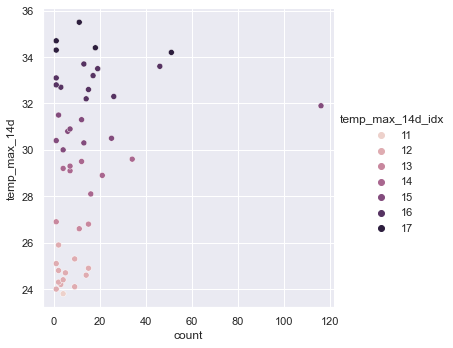

In [11]:
merge_td_tmax = merge_td.groupby('temp_max_14d',as_index=False).agg({'count':'count', 'temp_max_14d_idx':'mean'})
sns.relplot(x='count', y='temp_max_14d',hue='temp_max_14d_idx',data=merge_td_tmax)

<AxesSubplot:>

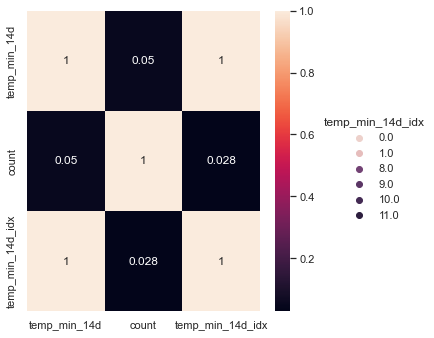

In [33]:
merge_td_tmin = merge_td.groupby('temp_min_14d',as_index=False).agg({'count':'count', 'temp_min_14d_idx':'mean'})
sns.relplot(x='count', y='temp_min_14d',hue='temp_min_14d_idx',data=merge_td_tmin)
sns.heatmap(merge_td_tmin.corr(), annot=True)

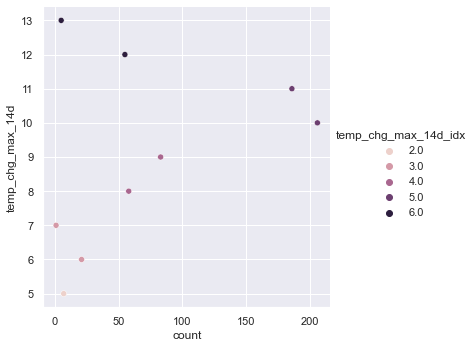

In [38]:
merge_td_chg_14d = merge_td.groupby('temp_chg_max_14d',as_index=False).agg({'count':'count', 'temp_chg_max_14d_idx':'mean'})
sns.relplot(x='count', y='temp_chg_max_14d',hue='temp_chg_max_14d_idx',data=merge_td_chg_14d)
# sns.heatmap(merge_td_chg_14d.corr(), annot=True)

### 30일간 기온 평균/최대/최소/일교차

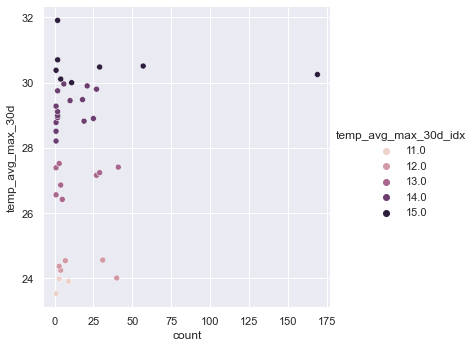

In [14]:
merge_td_tavg_max = merge_td.groupby('temp_avg_max_30d',as_index=False).agg({'count':'count', 'temp_avg_max_30d_idx':'mean'})
sns.relplot(x='count', y='temp_avg_max_30d',hue='temp_avg_max_30d_idx',data=merge_td_tavg_max)

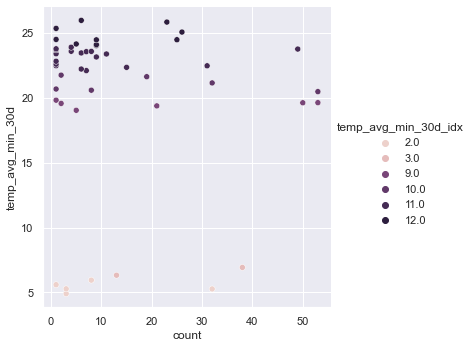

In [15]:
merge_td_tavg_min = merge_td.groupby('temp_avg_min_30d',as_index=False).agg({'count':'count', 'temp_avg_min_30d_idx':'mean'})
sns.relplot(x='count', y='temp_avg_min_30d',hue='temp_avg_min_30d_idx',data=merge_td_tavg_min)

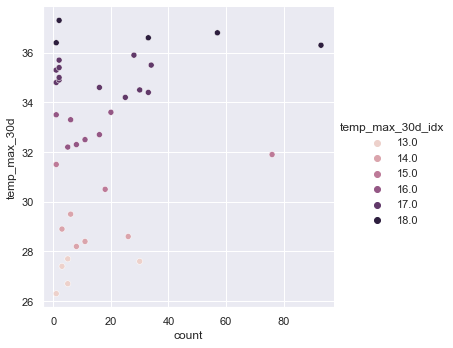

In [16]:
merge_td_tmax = merge_td.groupby('temp_max_30d',as_index=False).agg({'count':'count', 'temp_max_30d_idx':'mean'})
sns.relplot(x='count', y='temp_max_30d',hue='temp_max_30d_idx',data=merge_td_tmax)

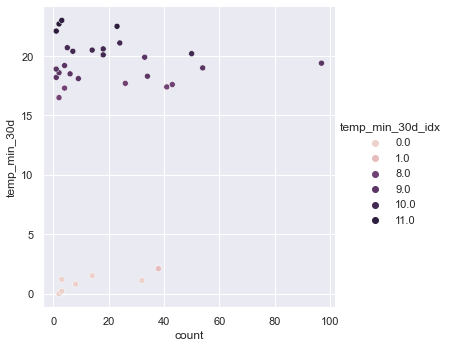

In [17]:
merge_td_tmin = merge_td.groupby('temp_min_30d',as_index=False).agg({'count':'count', 'temp_min_30d_idx':'mean'})
sns.relplot(x='count', y='temp_min_30d',hue='temp_min_30d_idx',data=merge_td_tmin)

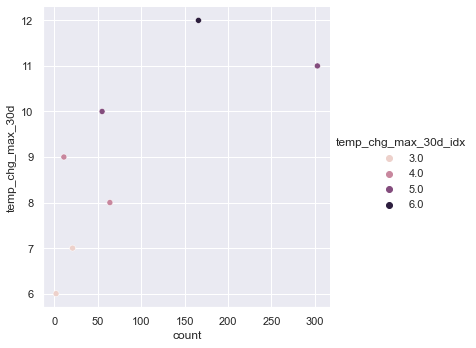

In [39]:
merge_td_chg_30d = merge_td.groupby('temp_chg_max_30d',as_index=False).agg({'count':'count', 'temp_chg_max_30d_idx':'mean'})
sns.relplot(x='count', y='temp_chg_max_30d',hue='temp_chg_max_30d_idx',data=merge_td_chg_30d)
# sns.heatmap(merge_td_chg_30d.corr(), annot=True)

In [29]:
merge_temp = pd.merge(merge_td_chg_7d,merge_td_chg_14d, how='outer')
merge_temp

,temp_chg_max_7d,count,temp_chg_max_7d_idx,temp_chg_max_14d,temp_chg_max_14d_idx
0,5.1,17,2.0,NaN,NaN
1,9.7,17,4.0,NaN,NaN
2,5.3,2,2.0,NaN,NaN
3,5.8,2,2.0,NaN,NaN
4,7.4,2,3.0,NaN,NaN
5,7.6,2,3.0,NaN,NaN
6,9.0,2,4.0,NaN,NaN
7,10.1,2,5.0,NaN,NaN
8,11.5,2,5.0,NaN,NaN
9,12.8,2,6.0,NaN,NaN


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
merge_td

In [ ]:
sns.set(rc={'figure.figsize':(30,15)})
# plt.title('temp_min<15', fontsize=20)
sns.heatmap(merge_td.corr(), annot=True)
# sns.relplot(x='count', y='hum_avg',data=merge_td,sizes=(20,8))